## ZOMATO EDA AND SALES ANALYSIS

### Sharpened my Power BI skills by analyzing Zomato sales data. This project allowed me to practice data cleaning, transformation, and visualization techniques. I'm particularly proud of the interactive dashboards I built, which offer actionable insights into sales performance. Open to connecting and discussing data analysis opportunities! 
#PowerBI #DataVisualization #DataAnalysis #Zomato #Skills #BusinessAnalytics

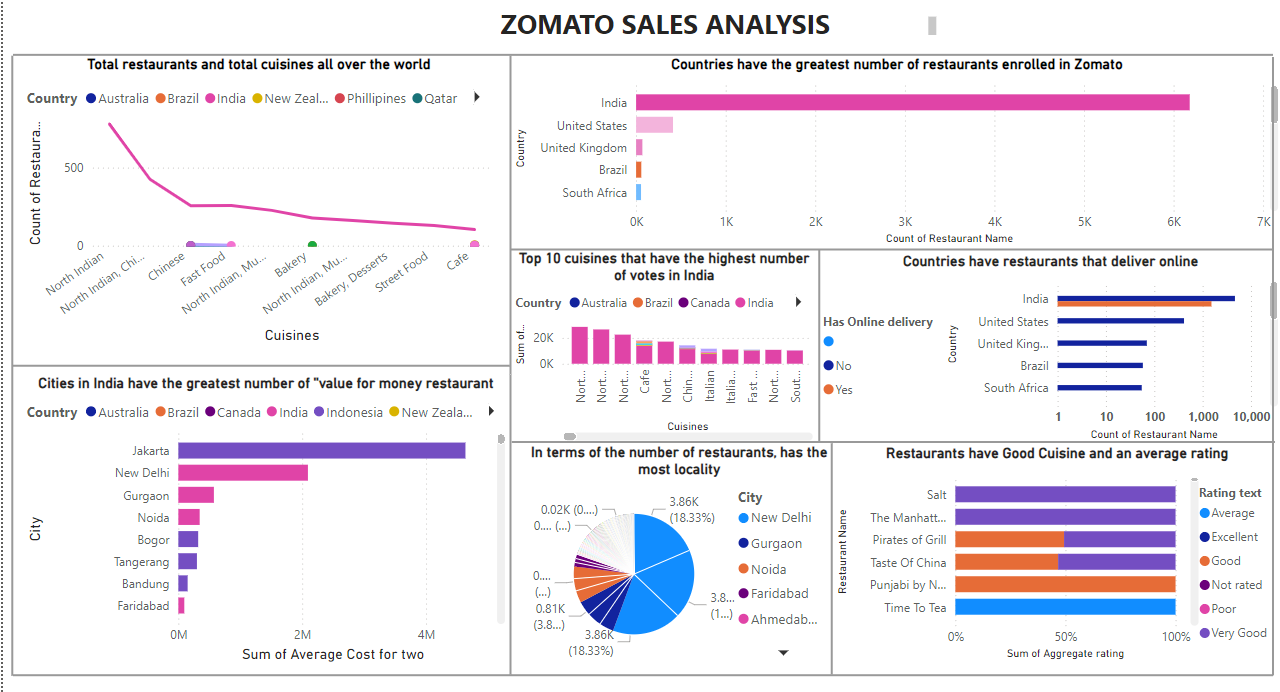

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df = pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Cleaning.....


In [3]:
#1..Deleting Redundant Column


# Display the first few rows of the dataset
print("Original DataFrame:")


df = df.drop(['votes','reviews_list','menu_item','phone'], axis=1)

df.head()

Original DataFrame:


,url,address,name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [4]:
# 2..Renaming the columns.


# Display the original column names
print("Original column names:")
print(df.columns)

Original column names:
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [5]:
# Dictionary of old and new column names
columns_rename = {
    'listed_in(type)': 'listed_in_type',
    'name': 'rest_name',
    'approx_cost(for two people)': 'approx_cost_for_two_people',
    'listed_in(city)': 'listed_in_city'
}

df.rename(columns=columns_rename, inplace=True)
df

,url,address,rest_name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [6]:
##3..Dropping duplicates.
df.drop_duplicates(keep='first',inplace=True)
df.head()

,url,address,rest_name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
#4..Cleaning individual columns.


df['rate'].replace('/5','',regex=True, inplace=True)
df


/tmp/ipykernel_18/230330438.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace('/5','',regex=True, inplace=True)


,url,address,rest_name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [8]:
#5..Remove the NaN values from the dataset

df['rate']=df['rate'].fillna('0')
df['dish_liked']=df['dish_liked'].fillna('-')
df

,url,address,rest_name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,Whitefield,Bar,-,Continental,"1,500",Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0,Whitefield,Bar,-,Finger Food,600,Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,Whitefield,Bar,-,Finger Food,"2,000",Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [9]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', '0',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [10]:
#6..Check for some more Transformations

df['rate']=df['rate'].replace("NEW|-",'0',regex=True)
df['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713       0
51714       0
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [11]:
df['approx_cost_for_two_people']=df['approx_cost_for_two_people'].replace(',','',regex=True)
df['approx_cost_for_two_people']


0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost_for_two_people, Length: 51717, dtype: object

In [12]:
df

,url,address,rest_name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,Whitefield,Bar,-,Continental,1500,Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0,Whitefield,Bar,-,Finger Food,600,Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,Whitefield,Bar,-,Finger Food,2000,Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,Pubs and bars,Whitefield


In [13]:
# rate column convert in string to float data type
df['rate']=df['rate'].astype(float)
df


,url,address,rest_name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,Whitefield,Bar,-,Continental,1500,Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0.0,Whitefield,Bar,-,Finger Food,600,Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,Whitefield,Bar,-,Finger Food,2000,Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,Pubs and bars,Whitefield


In [14]:
df['approx_cost_for_two_people']=df['approx_cost_for_two_people'].fillna(0).astype(int)
df

,url,address,rest_name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,Whitefield,Bar,-,Continental,1500,Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0.0,Whitefield,Bar,-,Finger Food,600,Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,Whitefield,Bar,-,Finger Food,2000,Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,Pubs and bars,Whitefield


# Data Visualization..



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

online_order = df['online_order'].value_counts()
print(online_order)


online_order
Yes    30444
No     21273
Name: count, dtype: int64


### 1...Restaurants delivering Online or not


<Axes: xlabel='online_order'>

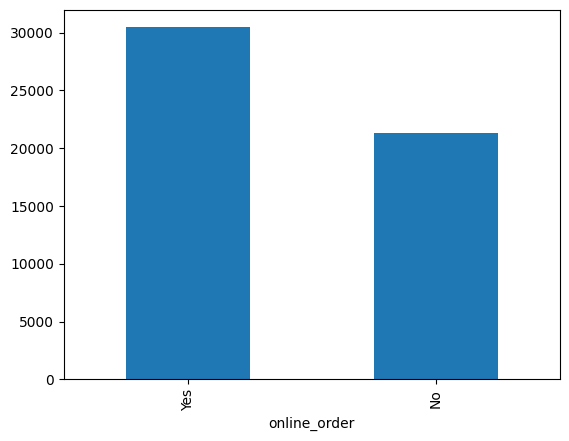

In [16]:
#1. using matplotlib
df['online_order'].value_counts().plot(kind='bar')

<Axes: xlabel='online_order', ylabel='count'>

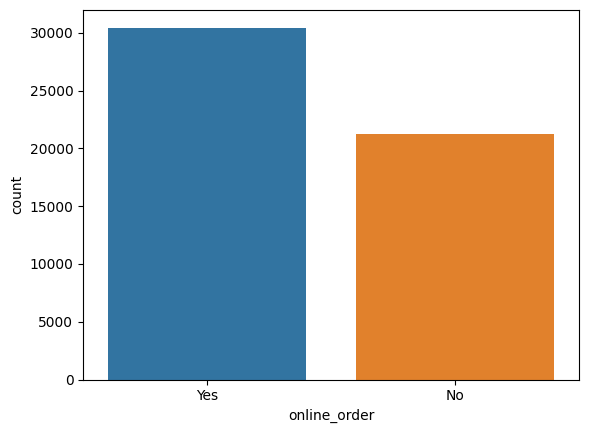

In [17]:
#2. using seaborn

sns.countplot(x='online_order', data=df)


### Restaurants allowing table booking or not


<Axes: xlabel='book_table'>

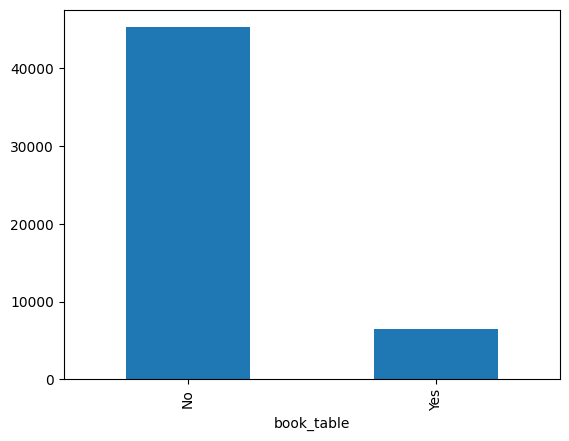

In [18]:
# 1. using matplot lib
df['book_table'].value_counts().plot(kind='bar')

<Axes: xlabel='book_table', ylabel='count'>

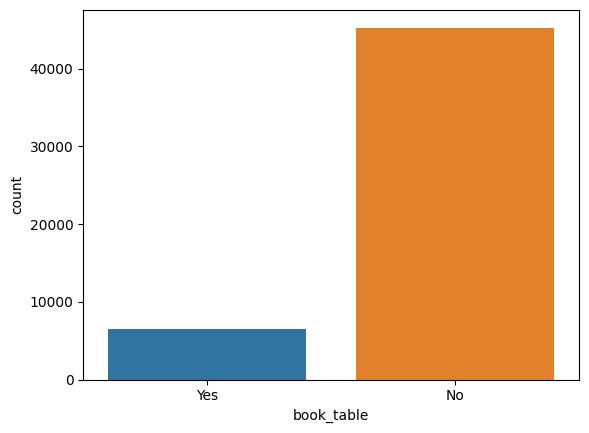

In [19]:
# 2. using seaborn plot library
# Restaurants allowing table booking or not

sns.countplot(x='book_table',data=df)

### Table booking  vs Rate


<Axes: xlabel='book_table'>

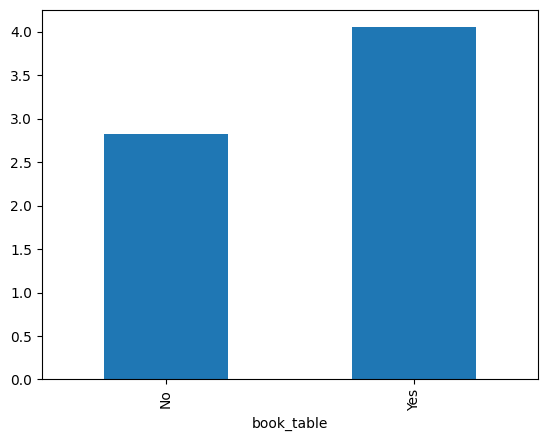

In [20]:
# 1 . using matplot lib
df.groupby('book_table')['rate'].mean().plot(kind='bar')

<Axes: xlabel='book_table', ylabel='rate'>

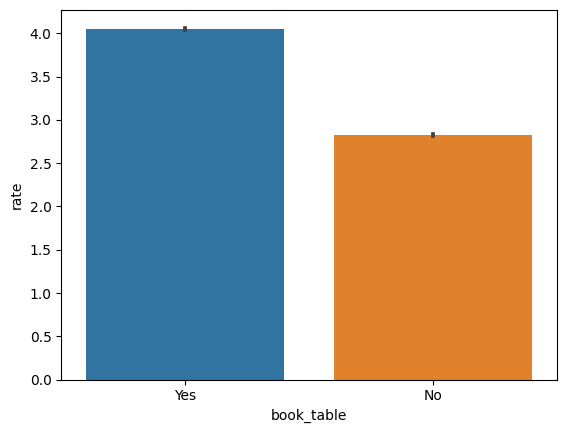

In [21]:
# 2 . using seaborn lib
sns.barplot(x='book_table', y='rate', data=df)

### Best Location


<Axes: xlabel='location'>

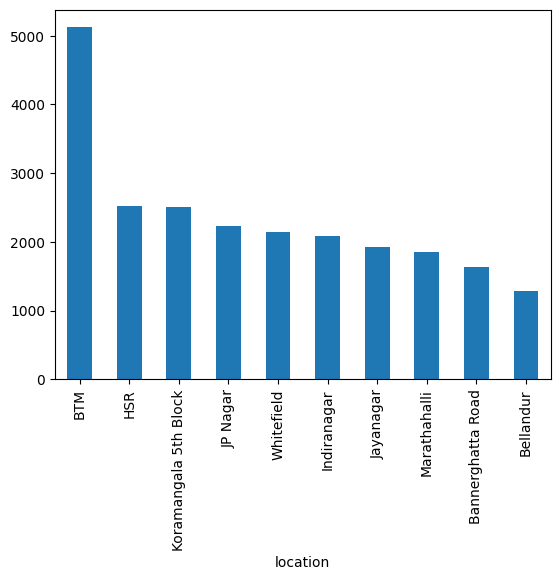

In [22]:
#1. using matplotlib


df['location'].value_counts().head(10).plot(kind='bar')

In [23]:
#2. Using Seaborn

# Best Location

b1=df.groupby('location')['rest_name'].count().reset_index()
b1

,location,rest_name
0,BTM,5124
1,Banashankari,906
2,Banaswadi,664
3,Bannerghatta Road,1630
4,Basavanagudi,684
...,...,...
88,West Bangalore,6
89,Whitefield,2144
90,Wilson Garden,246
91,Yelahanka,6


<Axes: title={'center': 'Best Location Resto'}, xlabel='rate', ylabel='location'>

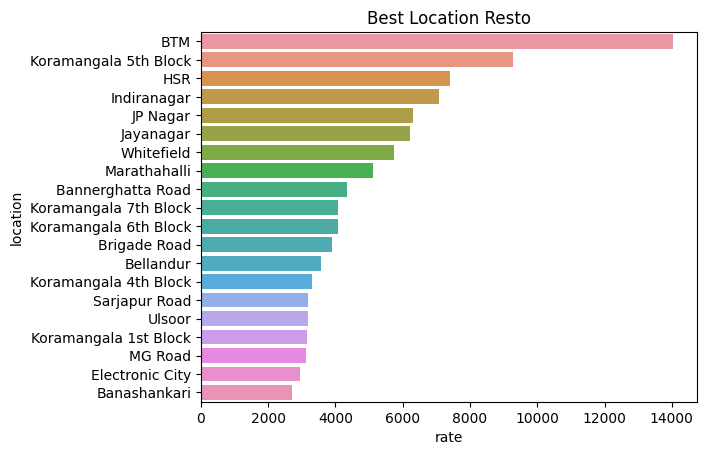

In [24]:
plt.title('Best Location Resto')
b1=df.groupby('location')[['rate']].sum().sort_values(by='rate',ascending=False).head(20)
sns.barplot(b1,y=b1.index,x='rate')

### Relation between Location and Rating


<Axes: xlabel='location'>

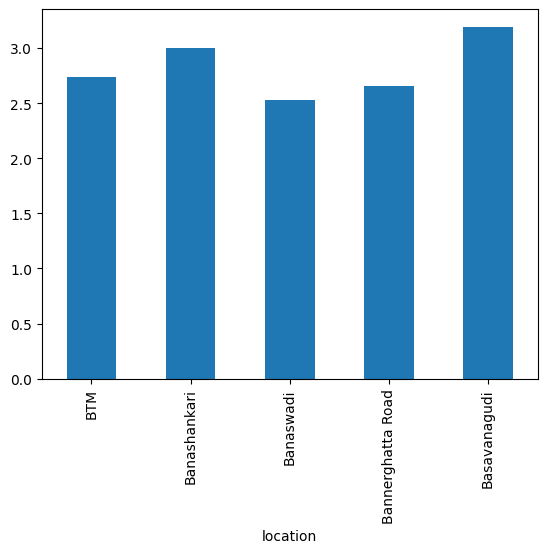

In [25]:
#1. Using Matplotlib
df.groupby('location')['rate'].mean().head().plot(kind='bar')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Relation between Location and Rating'}, xlabel='rate', ylabel='location'>

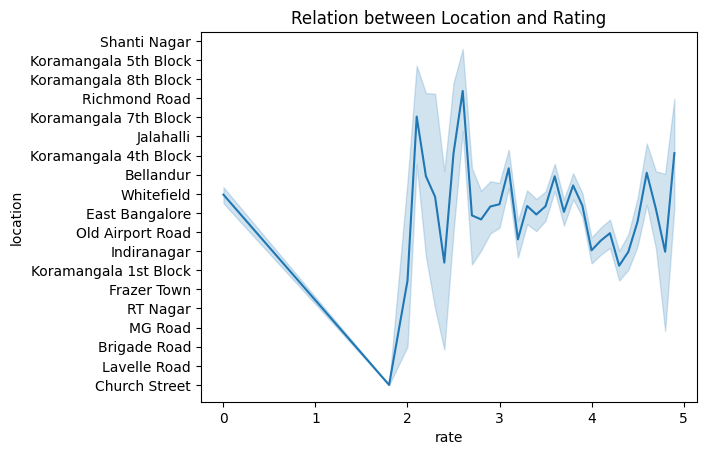

In [26]:
#2. Using Seaborn Relation between Location and Rating
plt.title('Relation between Location and Rating')
# plot create in lineplot view
sns.lineplot(y='location', x='rate',data=df)

<Axes: xlabel='location', ylabel='rate'>

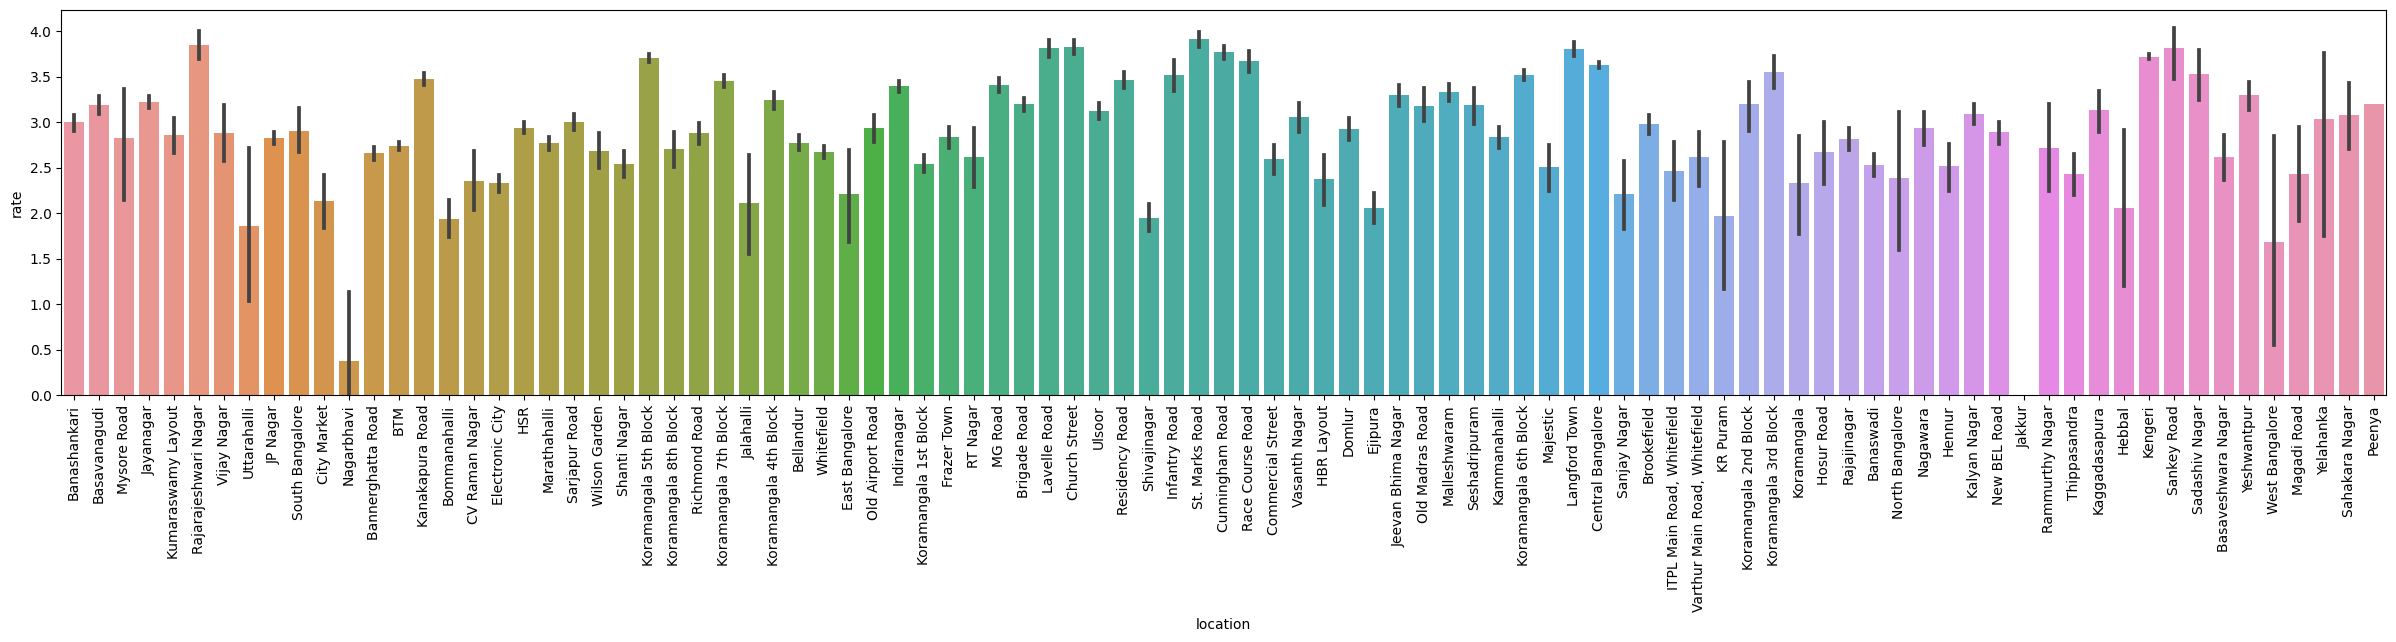

In [27]:
#using seaborn plot create in barplot view
plt.figure(figsize=(30,5),dpi=100)
plt.xticks(rotation=90)
sns.barplot(x='location',y='rate', data=df)

### Restaurant Type


<Axes: xlabel='rest_type'>

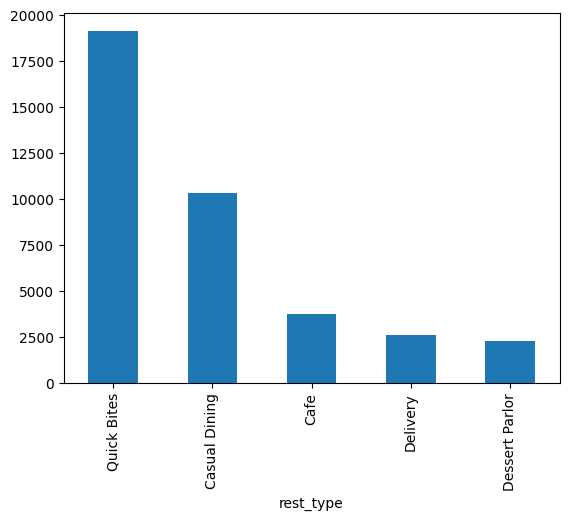

In [28]:

#1. using matplotlib

df['rest_type'].value_counts().head().plot(kind='bar')


<Axes: xlabel='count', ylabel='rest_type'>

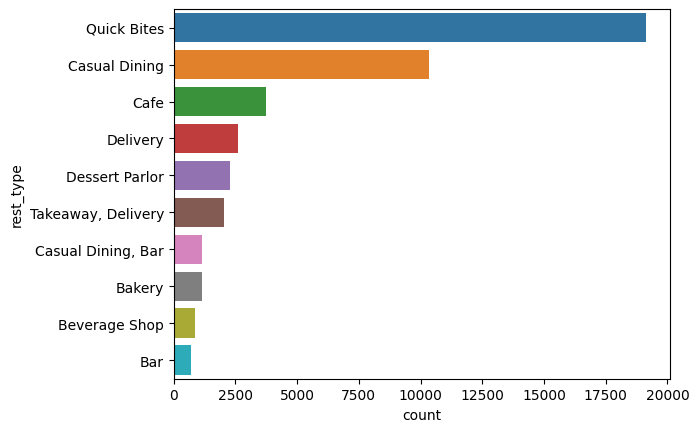

In [29]:
#2. using seaborn

p1=df['rest_type'].value_counts().head(10)
sns.barplot(y=p1.index, x=p1)

### Gaussian Rest type and Rating


Text(0, 0.5, 'Ratings')

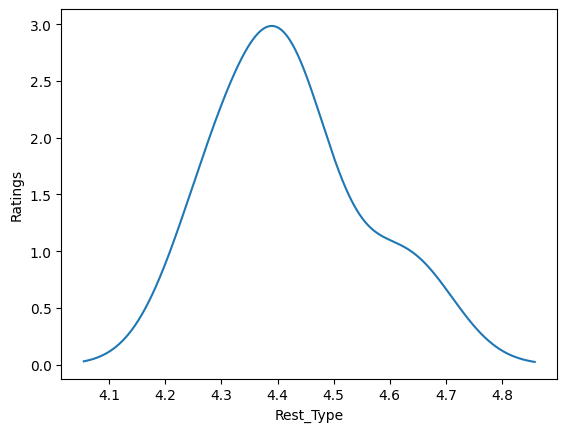

In [30]:
#1. using matplot lib
plt.xlabel('Rest_Type')
df.groupby('rest_type')['rate'].mean().sort_values().tail(10).plot(kind='kde')
plt.ylabel('Ratings')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Density'>

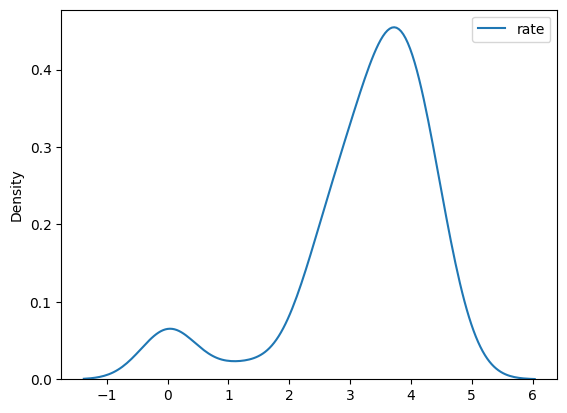

In [31]:
#2. using seaborn Gaussian Rest type and Rating
rest_rating = df.groupby('rest_type')[['rate']].mean()
sns.kdeplot(data=rest_rating)

### Types of Services


Text(0, 0.5, 'count')

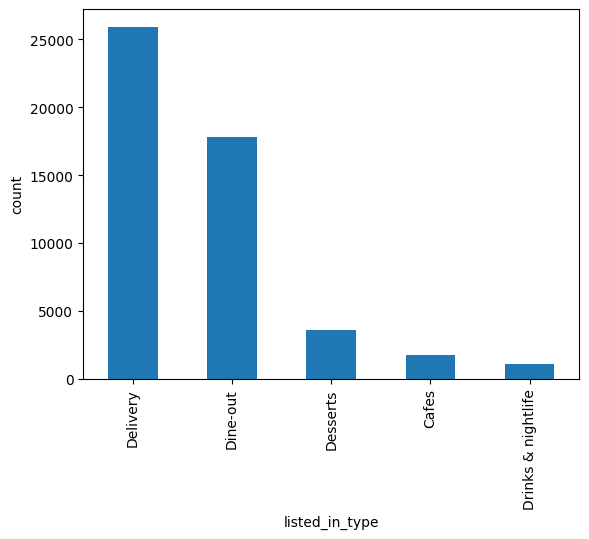

In [32]:

#1. using matplotlib

df['listed_in_type'].value_counts().head(5).plot(kind='bar')
plt.ylabel('count')

<Axes: xlabel='listed_in_type', ylabel='count'>

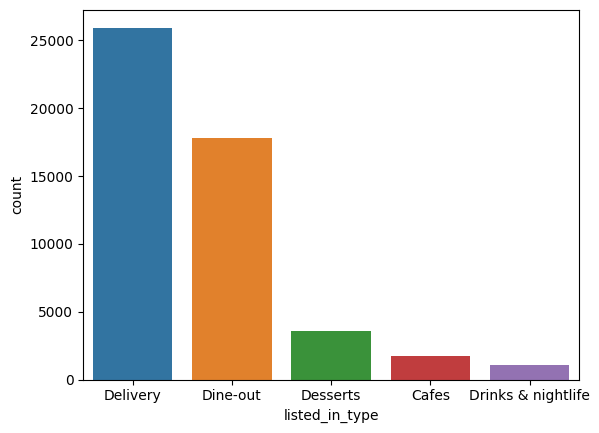

In [33]:
#2. Using Seaborn - Types of Service
p1=df['listed_in_type'].value_counts().head()
sns.barplot(x=p1.index, y=p1)

### Relation between Type and Rating


<Axes: xlabel='rest_type'>

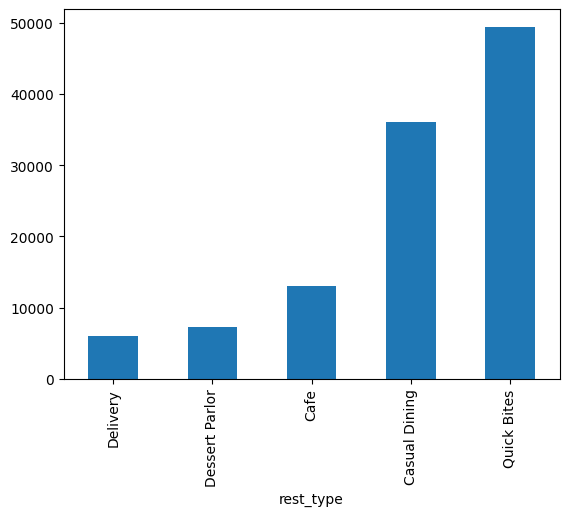

In [34]:
#1. using Matplotlib 
df.groupby('rest_type')['rate'].sum().sort_values().tail().plot(kind = 'bar')

<Axes: xlabel='rest_type', ylabel='rate'>

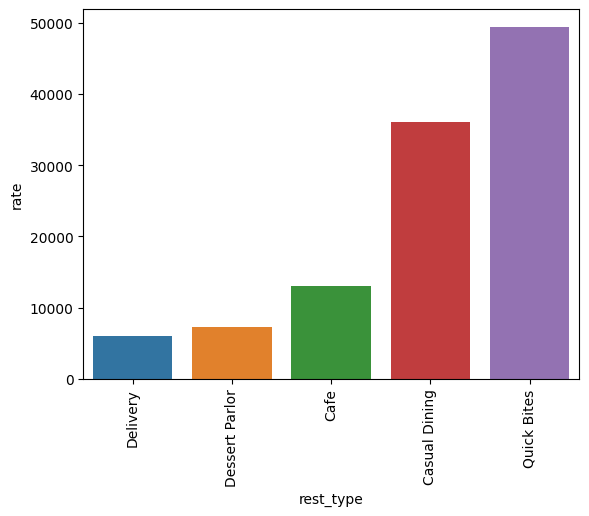

In [35]:
# Relation between Type and Rating
#2. using seaborn
plt.xticks(rotation=90)
p1=df.groupby('rest_type')['rate'].sum().sort_values().tail()
sns.barplot(x=p1.index, y=p1)

### Cost of Restaurant


<Axes: xlabel='approx_cost_for_two_people'>

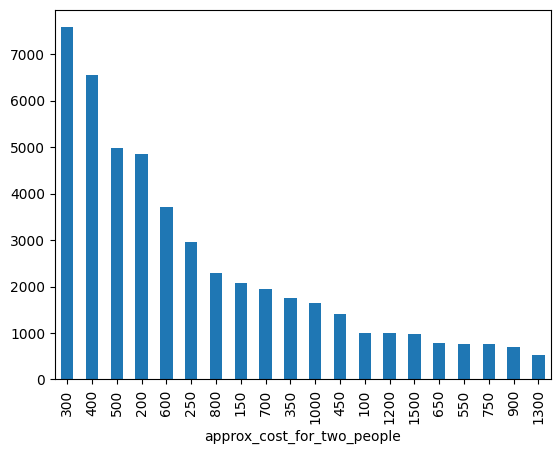

In [36]:

#1. Using matplotlib 

df['approx_cost_for_two_people'].value_counts().head(20).plot(kind='bar')

<Axes: title={'center': 'Cost of Restaurant'}, xlabel='approx_cost_for_two_people', ylabel='count'>

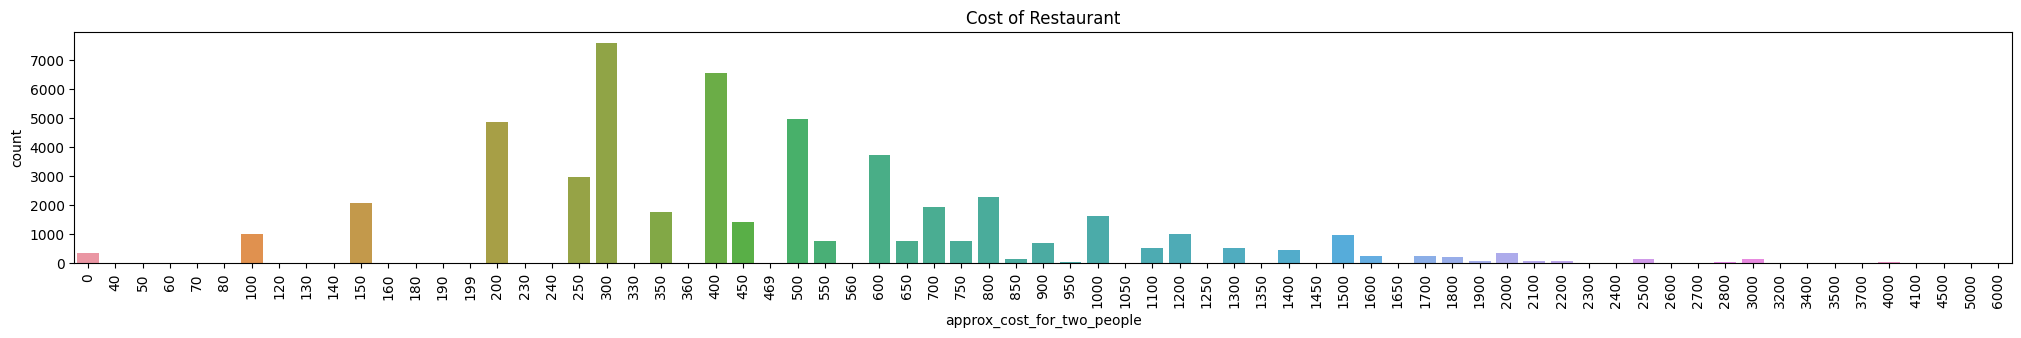

In [37]:
#2. Using Seaborn Cost of Restaurant

plt.figure(figsize=(25,3),dpi=100)
plt.xticks(rotation=90)
plt.title("Cost of Restaurant")
sns.countplot(x='approx_cost_for_two_people', data=df)

### No. of restaurants in a Location


<Axes: xlabel='location'>

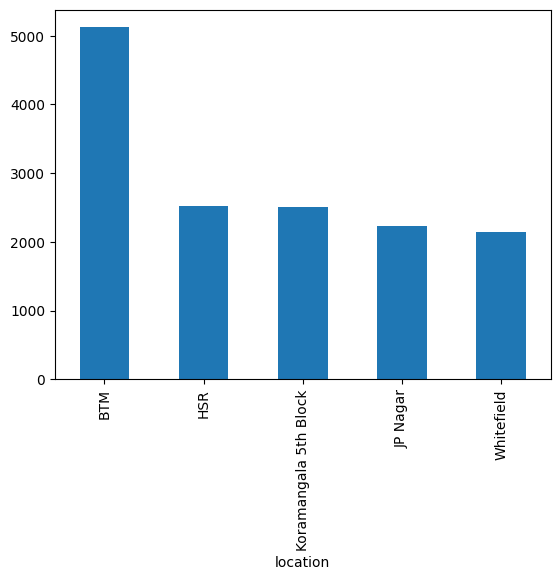

In [38]:
#1. using matplotlib

df['location'].value_counts().head().plot(kind='bar')

<Axes: xlabel='location', ylabel='count'>

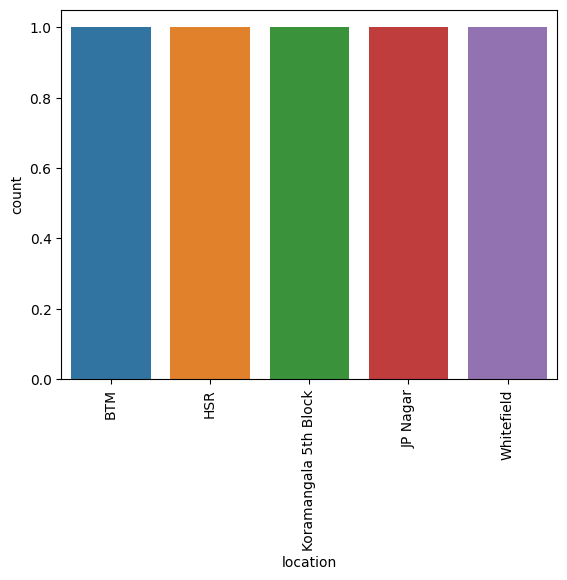

In [39]:
#2. using seaborn 
plt.xticks(rotation=90)
p1=df['location'].value_counts().head()
sns.countplot(x =p1.index)

### Most famous restaurant chains in Bengaluru


<Axes: xlabel='rest_name,location'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


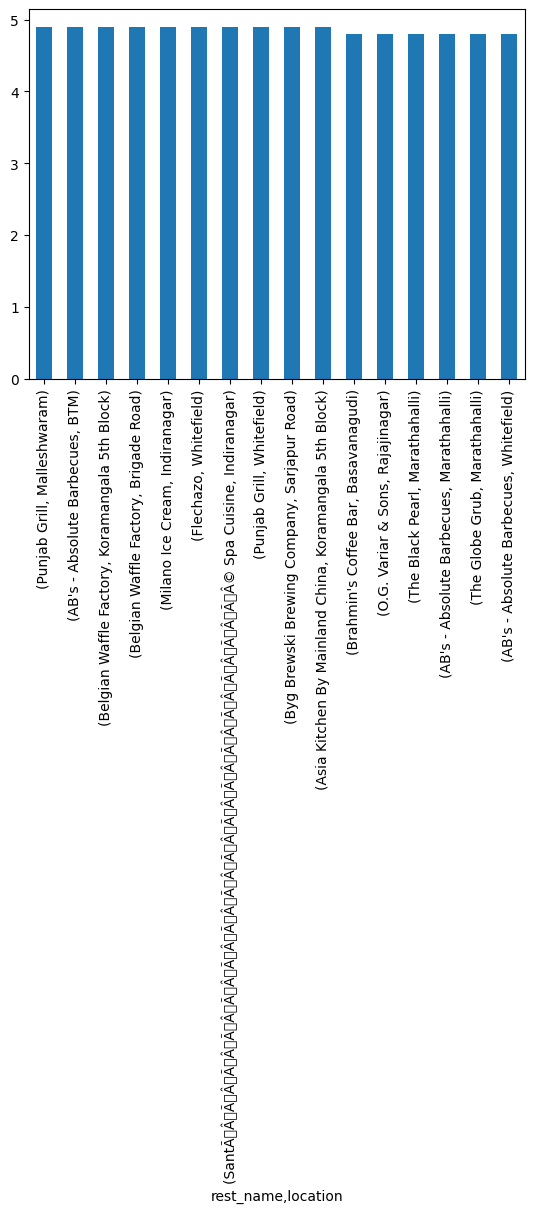

In [40]:
#1. using matplotlib 
a =df.groupby(['rest_name','location'])['rate'].max().sort_values(ascending=False).head(16)
a.plot(kind='bar')

In [41]:
#2. using Pandas

a = df.groupby(['rest_name','location'])['rate'].max().sort_values(ascending=False).head(16)
a

rest_name                                                                         location             
Punjab Grill                                                                      Malleshwaram             4.9
AB's - Absolute Barbecues                                                         BTM                      4.9
Belgian Waffle Factory                                                            Koramangala 5th Block    4.9
                                                                                  Brigade Road             4.9
Milano Ice Cream                                                                  Indiranagar              4.9
Flechazo                                                                          Whitefield               4.9
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine  Indiranagar              4.9
Punjab Grill                                                                      Whitefield               4.9
Byg Brew

<Axes: xlabel='rest_name,location'>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


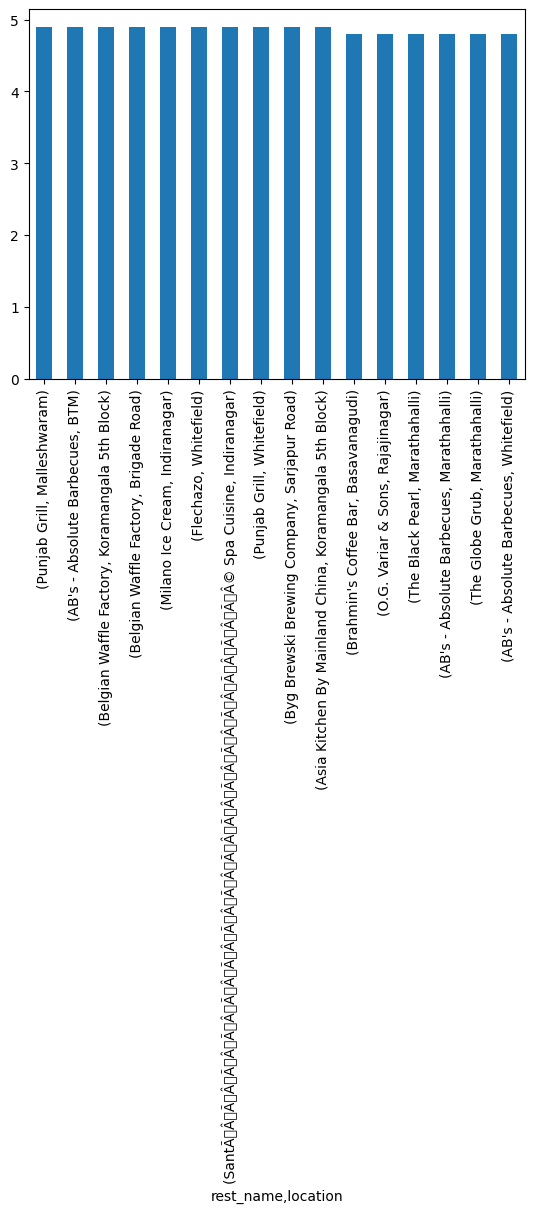

In [42]:
# plt.title('Most famous restaurant chains in Bengaluru')

# plt.plot(x, y)
# plt.xlabel('Y-axis')
# plt.ylabel('X-axis')
a.plot(kind = 'bar', y = a.index.get_level_values(1))
# a.index.get_level_values(1)

In [43]:
a

rest_name                                                                         location             
Punjab Grill                                                                      Malleshwaram             4.9
AB's - Absolute Barbecues                                                         BTM                      4.9
Belgian Waffle Factory                                                            Koramangala 5th Block    4.9
                                                                                  Brigade Road             4.9
Milano Ice Cream                                                                  Indiranagar              4.9
Flechazo                                                                          Whitefield               4.9
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine  Indiranagar              4.9
Punjab Grill                                                                      Whitefield               4.9
Byg Brew

<Axes: ylabel='location'>

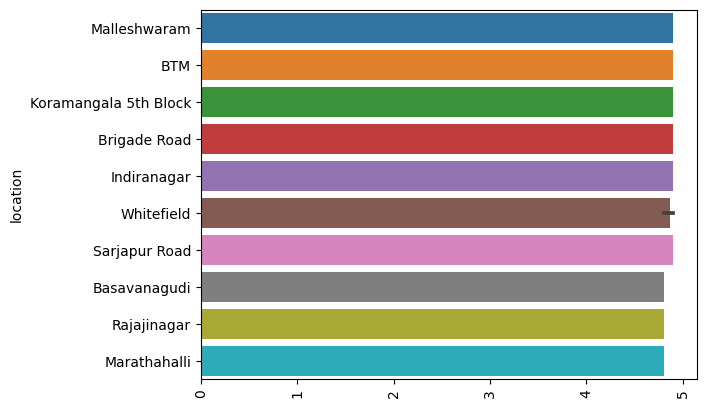

In [44]:
# using seaborn (rate and location)
plt.xticks(rotation=90)
sns.barplot(a, y = a.index.get_level_values(1), x = a.values)

<Axes: xlabel='rest_name,location'>

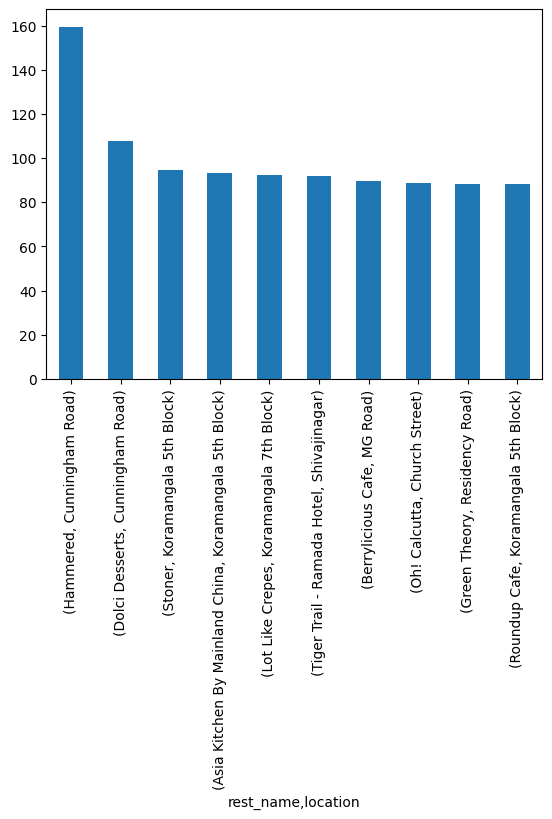

In [45]:
df.groupby(['rest_name','location'])['rate'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')